In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.reliancedigital.in/laptops/c/S101210?searchQuery=:relevance:availability:Exclude%20out%20of%20Stock&page=0"
data = requests.get(url)
lappy_data = BeautifulSoup(data.text)
print(data)
print(lappy_data)

<Response [200]>
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimum-scale=1.0" name="viewport"/>
<meta content="#e42529" name="theme-color"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="#e42529" name="apple-mobile-web-app-status-bar-style"/>
<meta content="A2HS Test" name="apple-mobile-web-app-title"/>
<link href="/build/client/images/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link content="#e42529" href="/build/client/images/safari-pinned-tab.svg" rel="mask-icon"/>
<link href="/manifest.json" rel="manifest"/>
<link crossorigin="" href="https://www.reliancedigital.in" rel="preconnect"/>
<link crossorigin="" href="//fonts.gstatic.com" rel="preconnect"/>
<link crossorigin="" href="https://www.googletagmanager.com" rel="preconnect"/>
<link crossori

In [3]:
brand = []
price = []


for i in range(1,25):
    url = "https://www.reliancedigital.in/laptops/c/S101210?searchQuery=:relevance:availability:Exclude%20out%20of%20Stock&page={}".format(i)
    data = requests.get(url)
    lappy_data = BeautifulSoup(data.text)
    for i in  lappy_data.find_all("p",class_="sp__name"):
        brand.append(i.text)
    for i in lappy_data.find_all("div",class_="sc-bwzfXH jWpSeo sc-bxivhb hILMWQ"):
        price.append(i.text)
        

print(brand)
print(price)

    
    

['Dell 3400 Vostro Laptop (11th Gen Intel Core i5-1135G7/8GB/1TB HDD + 256GB SSD/Integrated Intel Graphics/Windows 11/MSO/FHD), 35.56 cm (14 inch)', 'HP 15S-GR0012AU Laptop (AMD Ryzen 3 3250U/8GB/1TB HDD + 256GB SSD/AMD Radeon Vega 6 Graphics/Windows 10/MSO/FHD), 39.62 cm (15.6 inch)', 'HP 15s-FQ2076TU Laptop (11th Gen Intel Core i5-1135G7/8GB/512GB SSD/Intel UHD Graphics/Windows 10/MSO/Full HD), 39.62 cm (15.6 inch)', 'Dell 3515 Inspiron 15 (AMD Ryzen 5 3450U/8GB/256GB SSD/AMD Radeon Vega 8 Graphic/Windows 11/MSO/FHD), 39.62 cm (15.6 inch)', 'Lenovo 8QIN Ideapad Slim 3 Laptop (10th-Intel Core i3-10110U/8GB/256GB SSD/Intel UHD Graphics/Windows 11/MSO/FHD), 39.62 cm (15.6 inch)', 'HP 15s-du3060TX Laptop (11th Gen Intel Core i5-1135G7/8GB/1TB SATA HDD/NVIDIA GeForce MX350/Windows 10 Home 64 Plus Single Language/MSO/FHD)39.6 cm (15.6 inch)', 'HP 15-eg1000TU Pavilion Laptop (11th Gen Intel Core i5-1155G7/8GB/512GB SSD/Intel Iris Xe Graphics/Windows 11/MSO/Full HD), 39.6 cm (15.6 inch)', 'H

In [4]:
import pandas as pd
df = pd.DataFrame({"Brand":brand,
                  "Price":price})


In [5]:
df["brand"]=df["Brand"].str.split(" ",expand = True)[0]


In [6]:
import numpy as np
import pandas as pd
import re
a = []
for i in df["Brand"]:
    b=re.findall(r"\d+\w+\sGen",i)
    if b:
        a.append(b)
    else:
        a.append("NaN")
df["Gen"]=pd.Series(a).apply(lambda x:"".join(x))

In [7]:
import regex as re

In [8]:
re1=re.compile(r"\(.*?\/")

In [9]:
re1.findall(df["Brand"][100])

['(AMD 3020e/']

In [10]:
v=df['Brand'].apply(lambda x:re1.findall(x))

In [11]:
df['Processor']=v.apply(lambda x:"".join(x))

In [12]:
df["Offer Price"]=df["Price"].str.split("₹",expand = True)[1]

In [13]:
c = []
for i in df["Price"]:
    if i is not None:
        c.append(re.findall(r"(\d\d)%",i))
    else:
        c.append("NaN")
df["discount"]=pd.Series(c).apply(lambda x:"".join(x))

In [14]:
df["model"]=df["Brand"].str.split("(",expand = True)[0]


In [15]:
d = []
for i in df["Brand"]:
    if i is not None:
        d.append(re.findall(r"/(\d+)GB/",i))
    else:
        d.append("NaN")
df["RAM"]=pd.Series(d).apply(lambda x:"".join(x))

In [16]:
e=[]
for i in df['Brand']:
    if '/' in i.split('(')[1]:
        e.append(i.split('(')[1].split('/')[2])
    else:
        e.append("NaN")
df["SSD"]= e      

In [17]:
f=[]
for i in df['Brand']:
    if 'inch' in i:
        f.append(i.split()[-2:])
    else:
        f.append("NaN")
df['Display(inches)']=f

In [18]:
df['Display(inches)'] = df['Display(inches)'].apply(lambda x: re.findall(r"\d+.\d+|\w+",str(x))[0])

In [19]:
df

,Brand,Price,brand,Gen,Processor,Offer Price,discount,model,RAM,SSD,Display(inches)
0,Dell 3400 Vostro Laptop (11th Gen Intel Core i...,"₹60,999.00₹74,024.0018%(₹13,025)",Dell,11th Gen,(11th Gen Intel Core i5-1135G7/,"60,999.00",18,Dell 3400 Vostro Laptop,8,1TB HDD + 256GB SSD,14
1,HP 15S-GR0012AU Laptop (AMD Ryzen 3 3250U/8GB/...,"₹41,499.00₹42,999.003%(₹1,500)",HP,NaN,(AMD Ryzen 3 3250U/,"41,499.00",03,HP 15S-GR0012AU Laptop,8,1TB HDD + 256GB SSD,15.6
2,HP 15s-FQ2076TU Laptop (11th Gen Intel Core i5...,"₹55,999.00₹67,866.0017%(₹11,867)",HP,11th Gen,(11th Gen Intel Core i5-1135G7/,"55,999.00",17,HP 15s-FQ2076TU Laptop,8,512GB SSD,15.6
3,Dell 3515 Inspiron 15 (AMD Ryzen 5 3450U/8GB/2...,"₹46,499.00₹58,263.0020%(₹11,764)",Dell,NaN,(AMD Ryzen 5 3450U/,"46,499.00",20,Dell 3515 Inspiron 15,8,256GB SSD,15.6
4,Lenovo 8QIN Ideapad Slim 3 Laptop (10th-Intel ...,"₹38,499.00₹62,890.0039%(₹24,391)",Lenovo,NaN,(10th-Intel Core i3-10110U/,"38,499.00",39,Lenovo 8QIN Ideapad Slim 3 Laptop,8,256GB SSD,15.6
...,...,...,...,...,...,...,...,...,...,...,...
363,Dell 3511 Inspiron 15 Standard Laptop (11th Ge...,"₹59,999.00₹81,173.0026%(₹21,174)",Dell,11th Gen,(11th Gen Intel Core i5-1135G7 Processor/,"59,999.00",26,Dell 3511 Inspiron 15 Standard Laptop,8,256GB + 1TB Hybrid,15.6
364,HP 14-eb0019TX Envy Gaming Laptop (11th Gen In...,"₹93,099.00₹118,776.0022%(₹25,677)",HP,11th Gen,(11th Gen Intel Core i5-1135G7/,"93,099.00",22,HP 14-eb0019TX Envy Gaming Laptop,16,512GB SSD,14
365,HP E13-bd0521TU Envy x360 Convertible Laptop (...,"₹99,749.00₹124,533.0020%(₹24,784)",HP,11th Gen,(11th Gen Intel Core i7-1165G7/,"99,749.00",20,HP E13-bd0521TU Envy x360 Convertible Laptop,,512 GB SSD,13.3
366,HP 14s-dr1006tu Laptop (10th Gen Intel Core i7...,"₹73,999.00₹86,621.0015%(₹12,622)",HP,10th Gen,(10th Gen Intel Core i7-1065G7/,"73,999.00",15,HP 14s-dr1006tu Laptop,,512 GB SSD,14


In [20]:
g =[]
for i in df["Offer Price"]:
    g.append(i.replace(",",""))
df['Offer_Price']=g

In [21]:
h= []
for i in df['Gen']:
    d=(re.findall(r'(\d+)th\sGen',i))
    if d:
        h.append(d)
    else:
        h.append(np.nan)
df['GEN']=h

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            368 non-null    object
 1   Price            368 non-null    object
 2   brand            368 non-null    object
 3   Gen              368 non-null    object
 4   Processor        368 non-null    object
 5   Offer Price      368 non-null    object
 6   discount         368 non-null    object
 7   model            368 non-null    object
 8   RAM              368 non-null    object
 9   SSD              368 non-null    object
 10  Display(inches)  368 non-null    object
 11  Offer_Price      368 non-null    object
 12  GEN              256 non-null    object
dtypes: object(13)
memory usage: 37.5+ KB


In [23]:
j= []
for i in df['Processor']:
    d=(re.findall(r'Core\s\w(\d+)\W|Ryzen\s(\d+)',i))
    if d:
        j.append(d)
    else:
        j.append("NaN")

In [24]:
df1 = df.drop(["Brand","Offer Price"],axis = 1)
df1

,Price,brand,Gen,Processor,discount,model,RAM,SSD,Display(inches),Offer_Price,GEN
0,"₹60,999.00₹74,024.0018%(₹13,025)",Dell,11th Gen,(11th Gen Intel Core i5-1135G7/,18,Dell 3400 Vostro Laptop,8,1TB HDD + 256GB SSD,14,60999.00,[11]
1,"₹41,499.00₹42,999.003%(₹1,500)",HP,NaN,(AMD Ryzen 3 3250U/,03,HP 15S-GR0012AU Laptop,8,1TB HDD + 256GB SSD,15.6,41499.00,NaN
2,"₹55,999.00₹67,866.0017%(₹11,867)",HP,11th Gen,(11th Gen Intel Core i5-1135G7/,17,HP 15s-FQ2076TU Laptop,8,512GB SSD,15.6,55999.00,[11]
3,"₹46,499.00₹58,263.0020%(₹11,764)",Dell,NaN,(AMD Ryzen 5 3450U/,20,Dell 3515 Inspiron 15,8,256GB SSD,15.6,46499.00,NaN
4,"₹38,499.00₹62,890.0039%(₹24,391)",Lenovo,NaN,(10th-Intel Core i3-10110U/,39,Lenovo 8QIN Ideapad Slim 3 Laptop,8,256GB SSD,15.6,38499.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
363,"₹59,999.00₹81,173.0026%(₹21,174)",Dell,11th Gen,(11th Gen Intel Core i5-1135G7 Processor/,26,Dell 3511 Inspiron 15 Standard Laptop,8,256GB + 1TB Hybrid,15.6,59999.00,[11]
364,"₹93,099.00₹118,776.0022%(₹25,677)",HP,11th Gen,(11th Gen Intel Core i5-1135G7/,22,HP 14-eb0019TX Envy Gaming Laptop,16,512GB SSD,14,93099.00,[11]
365,"₹99,749.00₹124,533.0020%(₹24,784)",HP,11th Gen,(11th Gen Intel Core i7-1165G7/,20,HP E13-bd0521TU Envy x360 Convertible Laptop,,512 GB SSD,13.3,99749.00,[11]
366,"₹73,999.00₹86,621.0015%(₹12,622)",HP,10th Gen,(10th Gen Intel Core i7-1065G7/,15,HP 14s-dr1006tu Laptop,,512 GB SSD,14,73999.00,[10]


In [25]:
p =[]
for i in df1['Price']:
    p.append(i.split("₹")[-2])
p

q =[]
for i in p:
    q.append(i.split(".")[0])
q

mrp = []
for i in q:
    mrp.append(i.replace(",",""))
df1["MRP"]=pd.Series(mrp).apply(lambda x:"".join(x))

offer = []
for i in df1["Offer_Price"]:
    offer.append(i.split(".")[0])
offer
df1["offer_price"]=pd.Series(offer).apply(lambda x:"".join(x))


In [26]:
df2 = df1.drop(["Price"],axis = 1)


In [27]:
pro= []
for i in df['Processor']:
    d=(re.findall(r'Core\s(\w+\d+)|Ryzen\s(\d+)',i))
    if d:
        pro.append(d[0])
    else:
        pro.append(np.nan)
df2["Processor"]=pro

df2['Processor'] = df2["Processor"].apply(lambda x: re.findall(r'\d+|\w+',str(x))[0])

In [28]:
ssd = []
for i in df["SSD"]:
    a= re.findall(r"(\d+)GB",i)
    if a:
        ssd.append(a[0])
    else:
        ssd.append(np.nan)
df2["ssd"]=ssd

In [29]:
df3=df2.drop(["SSD","Offer_Price"],axis = 1)
df3

,brand,Gen,Processor,discount,model,RAM,Display(inches),GEN,MRP,offer_price,ssd
0,Dell,11th Gen,i5,18,Dell 3400 Vostro Laptop,8,14,[11],74024,60999,256
1,HP,NaN,3,03,HP 15S-GR0012AU Laptop,8,15.6,NaN,42999,41499,256
2,HP,11th Gen,i5,17,HP 15s-FQ2076TU Laptop,8,15.6,[11],67866,55999,512
3,Dell,NaN,5,20,Dell 3515 Inspiron 15,8,15.6,NaN,58263,46499,256
4,Lenovo,NaN,i3,39,Lenovo 8QIN Ideapad Slim 3 Laptop,8,15.6,NaN,62890,38499,256
...,...,...,...,...,...,...,...,...,...,...,...
363,Dell,11th Gen,i5,26,Dell 3511 Inspiron 15 Standard Laptop,8,15.6,[11],81173,59999,256
364,HP,11th Gen,i5,22,HP 14-eb0019TX Envy Gaming Laptop,16,14,[11],118776,93099,512
365,HP,11th Gen,i7,20,HP E13-bd0521TU Envy x360 Convertible Laptop,,13.3,[11],124533,99749,NaN
366,HP,10th Gen,i7,15,HP 14s-dr1006tu Laptop,,14,[10],86621,73999,NaN


In [30]:
gen = []
for i in df3['Gen']:
    a = re.findall("\d+",str(i))
    #print(len(a))
    if len(a)>0:
        gen.append(a[0])
    else:
        gen.append(np.nan)

In [31]:
df3['Gen']=gen

In [32]:
df3["Gen"].value_counts()

11     155
10      95
9        4
8        1
111      1
Name: Gen, dtype: int64

In [33]:
lappy_data = df3.rename(columns={"brand":"Brand_Name","Gen":"Generation","discount":"Discount(%)","model":"Model","RAM":"RAM(GB)","MRP":"MRP(₹)","offer_price":"Offer_Price(₹)","ssd":"Storage(SSD)"})
lappy_data = lappy_data[["Model","Brand_Name","Processor","Generation","RAM(GB)","Storage(SSD)","Display(inches)","MRP(₹)","Discount(%)","Offer_Price(₹)"]]
lappy_data

,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Dell 3400 Vostro Laptop,Dell,i5,11,8,256,14,74024,18,60999
1,HP 15S-GR0012AU Laptop,HP,3,NaN,8,256,15.6,42999,03,41499
2,HP 15s-FQ2076TU Laptop,HP,i5,11,8,512,15.6,67866,17,55999
3,Dell 3515 Inspiron 15,Dell,5,NaN,8,256,15.6,58263,20,46499
4,Lenovo 8QIN Ideapad Slim 3 Laptop,Lenovo,i3,NaN,8,256,15.6,62890,39,38499
...,...,...,...,...,...,...,...,...,...,...
363,Dell 3511 Inspiron 15 Standard Laptop,Dell,i5,11,8,256,15.6,81173,26,59999
364,HP 14-eb0019TX Envy Gaming Laptop,HP,i5,11,16,512,14,118776,22,93099
365,HP E13-bd0521TU Envy x360 Convertible Laptop,HP,i7,11,,NaN,13.3,124533,20,99749
366,HP 14s-dr1006tu Laptop,HP,i7,10,,NaN,14,86621,15,73999


In [34]:
lappy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Model            368 non-null    object
 1   Brand_Name       368 non-null    object
 2   Processor        368 non-null    object
 3   Generation       256 non-null    object
 4   RAM(GB)          368 non-null    object
 5   Storage(SSD)     241 non-null    object
 6   Display(inches)  368 non-null    object
 7   MRP(₹)           368 non-null    object
 8   Discount(%)      368 non-null    object
 9   Offer_Price(₹)   368 non-null    object
dtypes: object(10)
memory usage: 28.9+ KB


In [35]:
lappy_data["Generation"].fillna(0,inplace = True)
lappy_data["Generation"].mode()

0    11
dtype: object

In [36]:
x =[]
for i in lappy_data["Generation"]:
    if i == 0 or i == "111":
        x.append("11")
    else:
        x.append(i)
lappy_data["Generation"] =x
lappy_data["Generation"].unique()

array(['11', '10', '8', '9'], dtype=object)

In [37]:
lappy_data["RAM(GB)"].fillna(0,inplace = True)
lappy_data["RAM(GB)"].mode()

0    8
dtype: object

In [38]:
y =[]
for i in lappy_data["RAM(GB)"]:
    if i == "":
        y.append("8")
    else:
        y.append(i)
lappy_data["RAM(GB)"] =y
lappy_data["RAM(GB)"].unique()

array(['8', '16', '4', '82'], dtype=object)

In [39]:
lappy_data["Processor"].fillna(0,inplace = True)
lappy_data["Processor"].mode()

0    i5
dtype: object

In [40]:
z =[]
for i in lappy_data["Processor"]:
    if i == "nan":
        z.append("i5")
    else:
        z.append(i)
lappy_data["Processor"] =z
lappy_data["Processor"].unique()

array(['i5', '3', '5', 'i3', 'i7', '7', '9'], dtype=object)

In [41]:
lappy_data["Storage(SSD)"].fillna(0,inplace = True)
lappy_data["Storage(SSD)"].unique()
lappy_data["Storage(SSD)"].mode()

0    512
dtype: object

In [42]:
aa =[]
for i in lappy_data["Storage(SSD)"]:
    if i == 0:
        aa.append("512")
    else:
        aa.append(i)
lappy_data["Storage(SSD)"] =aa
lappy_data["Storage(SSD)"].unique()

array(['256', '512', '64', '128'], dtype=object)

In [43]:
lappy_data["Display(inches)"].fillna(0,inplace = True)
lappy_data["Display(inches)"].mode()
lappy_data["Display(inches)"].unique()

array(['14', '15.6', '13.3', 'NaN', '16.1', '14.0', '13.4', '11.6',
       '12.3', '13', '17.3', '15', '13.5', 'GB', 'Space', '16', 'inch',
       '17', 'Thin'], dtype=object)

In [44]:
bb =[]
for i in lappy_data["Display(inches)"]:
    if i == 0 or i == "111" or i =='NaN' or i =='Space' or i =='inch' or i =='Thin' or i =='GB':
        bb.append("15.6")
    else:
        bb.append(i)
lappy_data["Display(inches)"] =bb
lappy_data["Display(inches)"].unique()

array(['14', '15.6', '13.3', '16.1', '14.0', '13.4', '11.6', '12.3', '13',
       '17.3', '15', '13.5', '16', '17'], dtype=object)

In [45]:
print(lappy_data["Processor"].unique())
print(lappy_data["Generation"].unique())
print(lappy_data["RAM(GB)"].unique())
print(lappy_data["Storage(SSD)"].unique())
print(lappy_data["Display(inches)"].unique())
print(lappy_data["Discount(%)"].unique())


['i5' '3' '5' 'i3' 'i7' '7' '9']
['11' '10' '8' '9']
['8' '16' '4' '82']
['256' '512' '64' '128']
['14' '15.6' '13.3' '16.1' '14.0' '13.4' '11.6' '12.3' '13' '17.3' '15'
 '13.5' '16' '17']
['18' '03' '17' '20' '39' '10' '16' '12' '09' '25' '37' '08' '13' '11'
 '27' '24' '14' '26' '29' '34' '' '15' '43' '33' '28' '06' '19' '21' '05'
 '02' '04' '23' '31' '30' '32' '36' '35' '42' '22' '07']


In [46]:
lappy_data.isnull().sum()

Model              0
Brand_Name         0
Processor          0
Generation         0
RAM(GB)            0
Storage(SSD)       0
Display(inches)    0
MRP(₹)             0
Discount(%)        0
Offer_Price(₹)     0
dtype: int64

In [47]:
lappy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Model            368 non-null    object
 1   Brand_Name       368 non-null    object
 2   Processor        368 non-null    object
 3   Generation       368 non-null    object
 4   RAM(GB)          368 non-null    object
 5   Storage(SSD)     368 non-null    object
 6   Display(inches)  368 non-null    object
 7   MRP(₹)           368 non-null    object
 8   Discount(%)      368 non-null    object
 9   Offer_Price(₹)   368 non-null    object
dtypes: object(10)
memory usage: 28.9+ KB


In [48]:
lappy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Model            368 non-null    object
 1   Brand_Name       368 non-null    object
 2   Processor        368 non-null    object
 3   Generation       368 non-null    object
 4   RAM(GB)          368 non-null    object
 5   Storage(SSD)     368 non-null    object
 6   Display(inches)  368 non-null    object
 7   MRP(₹)           368 non-null    object
 8   Discount(%)      368 non-null    object
 9   Offer_Price(₹)   368 non-null    object
dtypes: object(10)
memory usage: 28.9+ KB


In [49]:
lappy_data["Discount(%)"].unique()

array(['18', '03', '17', '20', '39', '10', '16', '12', '09', '25', '37',
       '08', '13', '11', '27', '24', '14', '26', '29', '34', '', '15',
       '43', '33', '28', '06', '19', '21', '05', '02', '04', '23', '31',
       '30', '32', '36', '35', '42', '22', '07'], dtype=object)

In [50]:
lappy_data["MRP(₹)"].unique

<bound method Series.unique of 0       74024
1       42999
2       67866
3       58263
4       62890
        ...  
363     81173
364    118776
365    124533
366     86621
367     74999
Name: MRP(₹), Length: 368, dtype: object>

In [51]:
cc =[]
for i in lappy_data["MRP(₹)"]:
    if i == "":
        cc.append(0)
    else:
        cc.append(i)
lappy_data["MRP(₹)"] =cc
lappy_data["MRP(₹)"].unique()



array(['74024', '42999', '67866', '58263', '62890', '64300', '77327',
       '68115', '71342', '92900', '90990', '96538', '94690', '122900',
       '51484', '79999', '89999', '138123', '97073', '118125', '140347',
       '131490', '113290', 0, '92419', '349890', '100940', '37449',
       '54999', '146890', '92921', '148290', '81790', '160890', '94999',
       '152098', '122990', '118890', '162990', '164990', '73504', '60963',
       '50990', '107690', '44788', '145377', '56590', '123606', '138490',
       '80889', '85290', '82899', '107262', '80699', '48358', '125142',
       '114690', '89992', '83990', '64990', '72949', '104990', '129990',
       '175990', '116090', '96490', '104890', '130090', '139890',
       '103808', '73625', '61590', '63990', '76890', '62990', '118990',
       '76175', '50196', '49590', '23490', '93999', '56431', '81840',
       '55156', '66633', '90890', '75023', '52990', '93419', '61765',
       '75490', '125890', '99290', '38390', '79690', '70990', '180990',
 

In [52]:
dd =[]
for i in lappy_data["MRP(₹)"]:
    if i == 0:
        dd.append("82490")
    else:
        dd.append(i)
lappy_data["MRP(₹)"] =dd

In [53]:
ee =[]
for i in lappy_data["Discount(%)"]:
    if i == "":
        ee.append(0)
    else:
        ee.append(i)
lappy_data["Discount(%)"] =ee
lappy_data["Discount(%)"].unique()

array(['18', '03', '17', '20', '39', '10', '16', '12', '09', '25', '37',
       '08', '13', '11', '27', '24', '14', '26', '29', '34', 0, '15',
       '43', '33', '28', '06', '19', '21', '05', '02', '04', '23', '31',
       '30', '32', '36', '35', '42', '22', '07'], dtype=object)

In [54]:
ff =[]
for i in lappy_data["Discount(%)"]:
    if i == 0:
        ff.append("22")
    else:
        ff.append(i)
lappy_data["Discount(%)"] =ff
lappy_data["Discount(%)"].unique()

array(['18', '03', '17', '20', '39', '10', '16', '12', '09', '25', '37',
       '08', '13', '11', '27', '24', '14', '26', '29', '34', '22', '15',
       '43', '33', '28', '06', '19', '21', '05', '02', '04', '23', '31',
       '30', '32', '36', '35', '42', '07'], dtype=object)

In [55]:
lappy_data['Generation'] = lappy_data['Generation'].astype('int')
lappy_data['Offer_Price(₹)'] = lappy_data['Offer_Price(₹)'].astype('int')
lappy_data['Display(inches)'] = lappy_data['Display(inches)'].astype('float')
lappy_data['RAM(GB)'] = lappy_data['RAM(GB)'].astype('int')
lappy_data['Storage(SSD)'] = lappy_data['Storage(SSD)'].astype('int')
lappy_data['MRP(₹)'] = lappy_data['MRP(₹)'].astype('int')
lappy_data['Discount(%)'] = lappy_data['Discount(%)'].astype('int')

In [56]:
lappy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            368 non-null    object 
 1   Brand_Name       368 non-null    object 
 2   Processor        368 non-null    object 
 3   Generation       368 non-null    int32  
 4   RAM(GB)          368 non-null    int32  
 5   Storage(SSD)     368 non-null    int32  
 6   Display(inches)  368 non-null    float64
 7   MRP(₹)           368 non-null    int32  
 8   Discount(%)      368 non-null    int32  
 9   Offer_Price(₹)   368 non-null    int32  
dtypes: float64(1), int32(6), object(3)
memory usage: 20.2+ KB


In [57]:
lappy_data

,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Dell 3400 Vostro Laptop,Dell,i5,11,8,256,14.0,74024,18,60999
1,HP 15S-GR0012AU Laptop,HP,3,11,8,256,15.6,42999,3,41499
2,HP 15s-FQ2076TU Laptop,HP,i5,11,8,512,15.6,67866,17,55999
3,Dell 3515 Inspiron 15,Dell,5,11,8,256,15.6,58263,20,46499
4,Lenovo 8QIN Ideapad Slim 3 Laptop,Lenovo,i3,11,8,256,15.6,62890,39,38499
...,...,...,...,...,...,...,...,...,...,...
363,Dell 3511 Inspiron 15 Standard Laptop,Dell,i5,11,8,256,15.6,81173,26,59999
364,HP 14-eb0019TX Envy Gaming Laptop,HP,i5,11,16,512,14.0,118776,22,93099
365,HP E13-bd0521TU Envy x360 Convertible Laptop,HP,i7,11,8,512,13.3,124533,20,99749
366,HP 14s-dr1006tu Laptop,HP,i7,10,8,512,14.0,86621,15,73999


In [71]:
lappy_data["Website"] = "Reliance_Digital"
lappy_data = lappy_data[["Website","Model","Brand_Name","Processor","Generation","RAM(GB)","Storage(SSD)","Display(inches)","MRP(₹)","Discount(%)","Offer_Price(₹)"]]
lappy_data

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Reliance_Digital,Dell 3400 Vostro Laptop,Dell,i5,11,8,256,14.0,74024,18,60999
1,Reliance_Digital,HP 15S-GR0012AU Laptop,HP,3,11,8,256,15.6,42999,3,41499
2,Reliance_Digital,HP 15s-FQ2076TU Laptop,HP,i5,11,8,512,15.6,67866,17,55999
3,Reliance_Digital,Dell 3515 Inspiron 15,Dell,5,11,8,256,15.6,58263,20,46499
4,Reliance_Digital,Lenovo 8QIN Ideapad Slim 3 Laptop,Lenovo,i3,11,8,256,15.6,62890,39,38499
...,...,...,...,...,...,...,...,...,...,...,...
363,Reliance_Digital,Dell 3511 Inspiron 15 Standard Laptop,Dell,i5,11,8,256,15.6,81173,26,59999
364,Reliance_Digital,HP 14-eb0019TX Envy Gaming Laptop,HP,i5,11,16,512,14.0,118776,22,93099
365,Reliance_Digital,HP E13-bd0521TU Envy x360 Convertible Laptop,HP,i7,11,8,512,13.3,124533,20,99749
366,Reliance_Digital,HP 14s-dr1006tu Laptop,HP,i7,10,8,512,14.0,86621,15,73999


In [58]:
file = "lappy_data.csv"
lappy_data.to_csv(file)

In [89]:
data1 = pd.read_csv("C:\\Users\\Lenovo\laptops1.csv")
data1

,Unnamed: 0,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,0,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
1,1,flipkart,Infinix INBook X1,Infinix,i5,10,8,512,14.0,59999.0,23.0,45990
2,2,flipkart,ASUS VivoBook 15,ASUS,i3,10,8,512,15.6,50990.0,15.0,42990
3,3,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.6,57479.0,22.0,44490
4,4,flipkart,ASUS TUF Gaming,ASUS,i5,10,8,512,15.6,81990.0,26.0,59990
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,496,flipkart,ASUS Zephyrus G14,ASUS,7,5,8,512,14.0,37990.0,18.0,111990
497,497,flipkart,HP Spectre x360,HP,i5,11,16,512,13.5,46194.0,23.0,111999
498,498,flipkart,DELL Inspiron Core,DELL,i5,11,8,512,15.6,86840.0,24.0,65890


In [90]:
data1.drop("Unnamed: 0", axis =1)

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
1,flipkart,Infinix INBook X1,Infinix,i5,10,8,512,14.0,59999.0,23.0,45990
2,flipkart,ASUS VivoBook 15,ASUS,i3,10,8,512,15.6,50990.0,15.0,42990
3,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.6,57479.0,22.0,44490
4,flipkart,ASUS TUF Gaming,ASUS,i5,10,8,512,15.6,81990.0,26.0,59990
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,ASUS,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,HP,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,DELL,i5,11,8,512,15.6,86840.0,24.0,65890


In [91]:
lappy_data

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Reliance_Digital,Dell 3400 Vostro Laptop,Dell,i5,11,8,256,14.0,74024,18,60999
1,Reliance_Digital,HP 15S-GR0012AU Laptop,HP,3,11,8,256,15.6,42999,3,41499
2,Reliance_Digital,HP 15s-FQ2076TU Laptop,HP,i5,11,8,512,15.6,67866,17,55999
3,Reliance_Digital,Dell 3515 Inspiron 15,Dell,5,11,8,256,15.6,58263,20,46499
4,Reliance_Digital,Lenovo 8QIN Ideapad Slim 3 Laptop,Lenovo,i3,11,8,256,15.6,62890,39,38499
...,...,...,...,...,...,...,...,...,...,...,...
363,Reliance_Digital,Dell 3511 Inspiron 15 Standard Laptop,Dell,i5,11,8,256,15.6,81173,26,59999
364,Reliance_Digital,HP 14-eb0019TX Envy Gaming Laptop,HP,i5,11,16,512,14.0,118776,22,93099
365,Reliance_Digital,HP E13-bd0521TU Envy x360 Convertible Laptop,HP,i7,11,8,512,13.3,124533,20,99749
366,Reliance_Digital,HP 14s-dr1006tu Laptop,HP,i7,10,8,512,14.0,86621,15,73999


In [106]:
project = [lappy_data,data1]
result = pd.concat(project)
project_data = result.drop("Unnamed: 0", axis =1)


In [104]:
project_data[project_data.Website=='flipkart']

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
1,flipkart,Infinix INBook X1,Infinix,i5,10,8,512,14.0,59999.0,23.0,45990
2,flipkart,ASUS VivoBook 15,ASUS,i3,10,8,512,15.6,50990.0,15.0,42990
3,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.6,57479.0,22.0,44490
4,flipkart,ASUS TUF Gaming,ASUS,i5,10,8,512,15.6,81990.0,26.0,59990
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,ASUS,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,HP,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,DELL,i5,11,8,512,15.6,86840.0,24.0,65890


In [105]:
file = "project_data.csv"
project_data.to_csv(file)

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Discount(%)', ylabel='Density'>

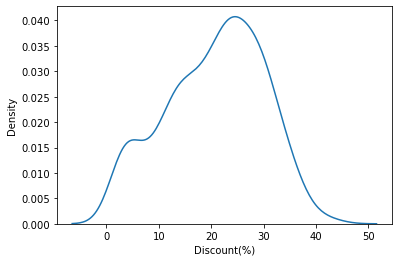

In [111]:
sns.kdeplot(lappy_data["Discount(%)"])

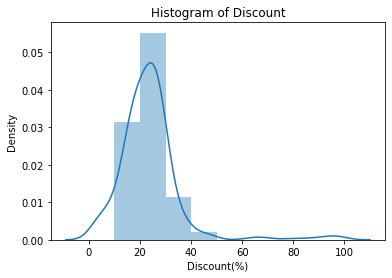

In [113]:
sns.distplot(data1["Discount(%)"],kde=True,bins = [10,20,30,40,50])
plt.title('Histogram of Discount')
plt.show()

In [116]:
lappy_data["Brand_Name"].unique()

array(['Dell', 'HP', 'Lenovo', 'Apple', 'Asus', 'Acer', 'AVITA',
       'Microsoft', 'VAIO', 'MSI'], dtype=object)

In [120]:
flip = project_data[project_data.Website=='flipkart']
flip["Brand_Name"].unique()

array(['Infinix', 'ASUS', 'DELL', 'Lenovo', 'HP', 'MSI', 'acer', 'lenovo',
       'APPLE', 'realme', 'RedmiBook', 'Nokia', 'Avita', 'ALIENWARE',
       'Mi', 'LG', 'Vaio', 'Smartron', 'MICROSOFT'], dtype=object)

In [132]:
project_data[(project_data['Brand_Name']=="DELL") & (project_data['Website']=="flipkart")]

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
3,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.60,57479.0,22.0,44490
12,flipkart,DELL Inspiron Athlon,DELL,NaN,11,4,256,15.60,42210.0,19.0,33990
18,flipkart,DELL Inspiron Ryzen,DELL,3,11,8,256,14.96,47695.0,21.0,37390
25,flipkart,DELL Vostro Core,DELL,i3,11,8,256,14.00,55448.0,25.0,41790
28,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,14.96,57670.0,28.0,41590
...,...,...,...,...,...,...,...,...,...,...,...
486,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.60,58490.0,14.0,49999
488,flipkart,DELL Ryzen 7,DELL,7,11,6,512,15.60,49188.0,20.0,117990
490,flipkart,DELL Ryzen 5,DELL,5,11,8,256,15.60,66560.0,19.0,53890
492,flipkart,DELL Inspiron Core,DELL,i3,10,8,512,15.60,55534.0,24.0,41790


In [157]:
updated=project_data

In [158]:
updated["Brand_Name"]=updated['Brand_Name'].str.lower()
updated

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Reliance_Digital,Dell 3400 Vostro Laptop,dell,i5,11,8,256,14.0,74024.0,18.0,60999
1,Reliance_Digital,HP 15S-GR0012AU Laptop,hp,3,11,8,256,15.6,42999.0,3.0,41499
2,Reliance_Digital,HP 15s-FQ2076TU Laptop,hp,i5,11,8,512,15.6,67866.0,17.0,55999
3,Reliance_Digital,Dell 3515 Inspiron 15,dell,5,11,8,256,15.6,58263.0,20.0,46499
4,Reliance_Digital,Lenovo 8QIN Ideapad Slim 3 Laptop,lenovo,i3,11,8,256,15.6,62890.0,39.0,38499
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,asus,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,hp,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,dell,i5,11,8,512,15.6,86840.0,24.0,65890


In [169]:
shravani = "updated.xlsx"

In [170]:
pwd

'C:\\Users\\Lenovo'

In [171]:
updated.to_excel(shravani)

In [174]:
import pandas as pd

In [186]:
data1 = pd.read_csv("C:\\Users\\Lenovo\\updated_data.csv",index_col=0)

In [187]:
data1

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Reliance_Digital,Dell 3400 Vostro Laptop,dell,i5,11,8,256,14.0,74024.0,18.0,60999
1,Reliance_Digital,HP 15S-GR0012AU Laptop,hp,3,11,8,256,15.6,42999.0,3.0,41499
2,Reliance_Digital,HP 15s-FQ2076TU Laptop,hp,i5,11,8,512,15.6,67866.0,17.0,55999
3,Reliance_Digital,Dell 3515 Inspiron 15,dell,5,11,8,256,15.6,58263.0,20.0,46499
4,Reliance_Digital,Lenovo 8QIN Ideapad Slim 3 Laptop,lenovo,i3,11,8,256,15.6,62890.0,39.0,38499
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,asus,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,hp,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,dell,i5,11,8,512,15.6,86840.0,24.0,65890


In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [206]:
#BRAND COUNT IN WEBSITES
#Filpkart offers more choices

In [269]:
num_of_brands= pd.crosstab(data1['Website'], data1['Brand_Name'])
num_of_brands

Brand_Name,acer,alienware,apple,asus,avita,dell,hp,infinix,lenovo,lg,mi,microsoft,msi,nokia,realme,redmibook,smartron,vaio
Website,,,,,,,,,,,,,,,,,,
Reliance_Digital,12,0,13,53,9,77,99,0,92,0,0,11,1,0,0,0,0,1
flipkart,42,2,15,91,2,69,56,83,83,3,1,2,44,1,2,2,1,1


In [270]:
fig = px.bar(num_of_brands.T, text_auto=True)
fig.show()

In [195]:
#Brands in each website.

<AxesSubplot:>

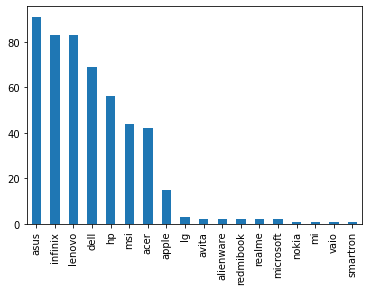

In [196]:

data1[data1['Website']=='flipkart']['Brand_Name'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

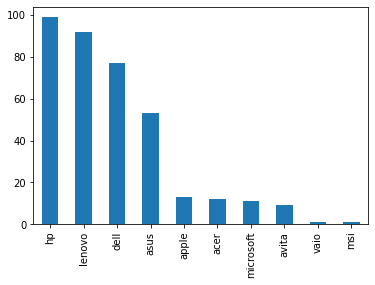

In [198]:

data1[data1['Website']=='Reliance_Digital']['Brand_Name'].value_counts().plot(kind = 'bar')

In [205]:
#Highest disciount offered brand 
# MI has MAX Offer

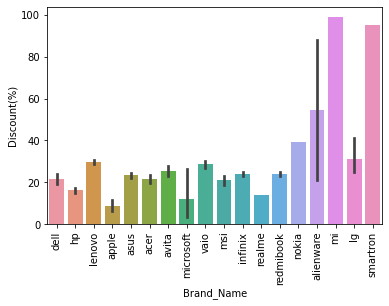

In [200]:
sns.barplot(x='Brand_Name',y='Discount(%)',data=data1)
plt.xticks(rotation = 90)
plt.show()

In [212]:
flipkart=data1[(data1['Brand_Name']=="dell") & (data1['Website']=="flipkart")]
flipkart

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
3,flipkart,DELL Inspiron Core,dell,i3,11,8,256,15.60,57479.0,22.0,44490
12,flipkart,DELL Inspiron Athlon,dell,NaN,11,4,256,15.60,42210.0,19.0,33990
18,flipkart,DELL Inspiron Ryzen,dell,3,11,8,256,14.96,47695.0,21.0,37390
25,flipkart,DELL Vostro Core,dell,i3,11,8,256,14.00,55448.0,25.0,41790
28,flipkart,DELL Inspiron Core,dell,i3,11,8,256,14.96,57670.0,28.0,41590
...,...,...,...,...,...,...,...,...,...,...,...
486,flipkart,DELL Inspiron Core,dell,i3,11,8,256,15.60,58490.0,14.0,49999
488,flipkart,DELL Ryzen 7,dell,7,11,6,512,15.60,49188.0,20.0,117990
490,flipkart,DELL Ryzen 5,dell,5,11,8,256,15.60,66560.0,19.0,53890
492,flipkart,DELL Inspiron Core,dell,i3,10,8,512,15.60,55534.0,24.0,41790


In [226]:
flipkart.groupby('Brand_Name')['Discount(%)'].max()

Brand_Name
dell    99.0
Name: Discount(%), dtype: float64

In [229]:
data1.groupby(['Website','Brand_Name'])['Discount(%)'].mean()

Website           Brand_Name
Reliance_Digital  acer          21.416667
                  apple         11.923077
                  asus          25.471698
                  avita         25.666667
                  dell          16.896104
                  hp            14.696970
                  lenovo        29.891304
                  microsoft      3.727273
                  msi           29.000000
                  vaio          27.000000
flipkart          acer          21.673333
                  alienware     54.500000
                  apple          5.871333
                  asus          22.013297
                  avita         23.000000
                  dell          26.626232
                  hp            18.448929
                  infinix       23.951807
                  lenovo        29.037831
                  lg            31.000000
                  mi            99.000000
                  microsoft     57.000000
                  msi           20.681818
     

<AxesSubplot:xlabel='Website,Brand_Name'>

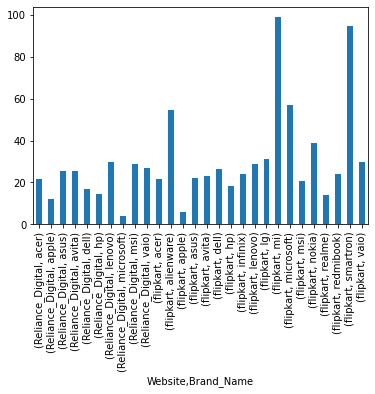

In [230]:
data1.groupby(['Website','Brand_Name'])['Discount(%)'].mean().plot(kind = 'bar')

In [237]:
# Discount offered for each brand in Flipkart.

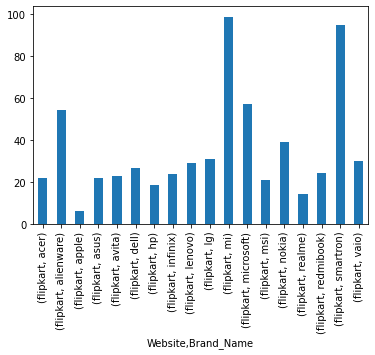

In [240]:
fig_3 = data1[data1['Website']=='flipkart'].groupby(['Website','Brand_Name'])['Discount(%)'].mean().plot(kind = 'bar')

In [238]:
# Discount offered for each brand in Reliance_Digital.

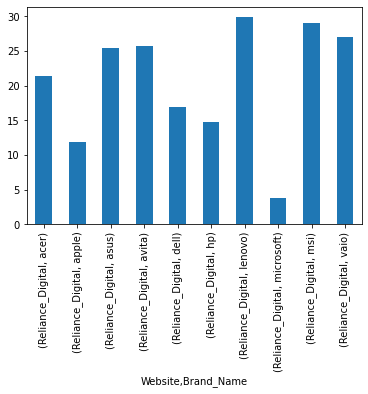

In [241]:
fig_4 = data1[data1['Website']=='Reliance_Digital'].groupby(['Website','Brand_Name'])['Discount(%)'].mean().plot(kind = 'bar')

In [239]:
data1

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,Reliance_Digital,Dell 3400 Vostro Laptop,dell,i5,11,8,256,14.0,74024.0,18.0,60999
1,Reliance_Digital,HP 15S-GR0012AU Laptop,hp,3,11,8,256,15.6,42999.0,3.0,41499
2,Reliance_Digital,HP 15s-FQ2076TU Laptop,hp,i5,11,8,512,15.6,67866.0,17.0,55999
3,Reliance_Digital,Dell 3515 Inspiron 15,dell,5,11,8,256,15.6,58263.0,20.0,46499
4,Reliance_Digital,Lenovo 8QIN Ideapad Slim 3 Laptop,lenovo,i3,11,8,256,15.6,62890.0,39.0,38499
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,asus,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,hp,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,dell,i5,11,8,512,15.6,86840.0,24.0,65890


In [253]:
# Processor Based

<AxesSubplot:>

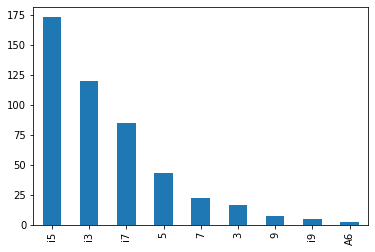

In [245]:
data1[data1['Website']=='flipkart']['Processor'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

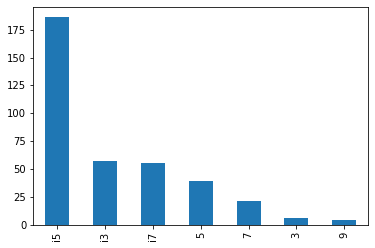

In [247]:
data1[data1['Website']=='Reliance_Digital']['Processor'].value_counts().plot(kind = 'bar')

In [251]:
# Generation based choices 

In [281]:
data1['Offer_Price(₹)'].describe()

count       868.000000
mean      70814.447005
std       37003.416719
min       15999.000000
25%       45999.000000
50%       60894.500000
75%       82537.250000
max      345390.000000
Name: Offer_Price(₹), dtype: float64

In [279]:
data1['MRP(₹)'].describe()

count    8.680000e+02
mean     1.568269e+06
std      1.452998e+06
min      8.799800e+04
25%      9.199200e+05
50%      1.199888e+06
75%      1.971710e+06
max      3.039432e+07
Name: MRP(₹), dtype: float64

In [287]:
data1[data1['Discount(%)'] == 99]

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
349,flipkart,Mi Notebook Horizon,mi,i7,10,8,512,14.0,5939901.0,99.0,59999
469,flipkart,DELL Vostro Core,dell,i5,11,8,512,14.0,6156810.0,99.0,62190


In [293]:
dis=[]
for i in data1['Discount(%)']:
    if i == "99.0":
        dis.append(9)
    else:
        dis.append(i)
data1['Discount(%)']=dis

In [295]:
data1['Discount(%)'].unique()

array([18.  ,  3.  , 17.  , 20.  , 39.  , 10.  , 16.  , 12.  ,  9.  ,
       25.  , 37.  ,  8.  , 13.  , 11.  , 27.  , 24.  , 14.  , 26.  ,
       29.  , 34.  , 22.  , 15.  , 43.  , 33.  , 28.  ,  6.  , 19.  ,
       21.  ,  5.  ,  2.  ,  4.  , 23.  , 31.  , 30.  , 32.  , 36.  ,
       35.  , 42.  ,  7.  , 41.  , 23.07, 45.  , 47.  , 65.  , 38.  ,
       68.  , 40.  , 91.  , 88.  , 63.  , 69.  , 99.  , 95.  , 94.  ,
       83.  , 46.  , 96.  , 78.  , 48.  ])

In [328]:
data1['MRP(₹)'] = data1['Offer_Price(₹)']*data1['Discount(%)']


In [299]:
data1['MRP(₹)'].describe()

count    8.680000e+02
mean     1.568269e+06
std      1.452998e+06
min      8.799800e+04
25%      9.199200e+05
50%      1.199888e+06
75%      1.971710e+06
max      3.039432e+07
Name: MRP(₹), dtype: float64

In [303]:
data1[data1['MRP(₹)'] == 30000000]

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)


In [315]:
data1.drop(index=330, axis=0,inplace=True)

In [316]:
data1["MRP(₹)"].sort_values()

44       87998.0
337     110970.0
113     118980.0
1       124497.0
257     124880.0
         ...    
469    6156810.0
452    7097220.0
444    7754670.0
25     8599957.0
377    9417860.0
Name: MRP(₹), Length: 866, dtype: float64

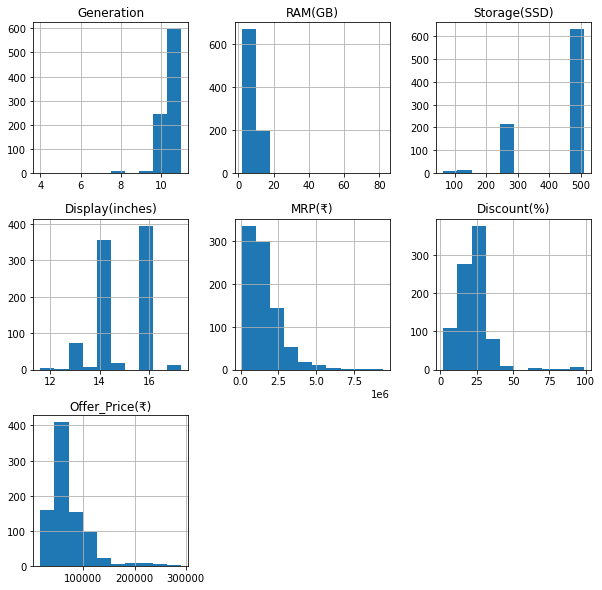

In [317]:
data1.hist(figsize = (10,10));

<AxesSubplot:>

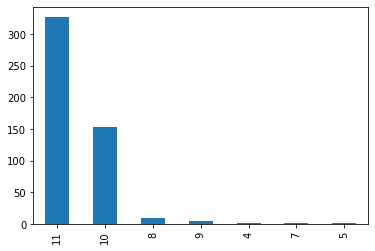

In [318]:
data1[data1['Website']=='flipkart']['Generation'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

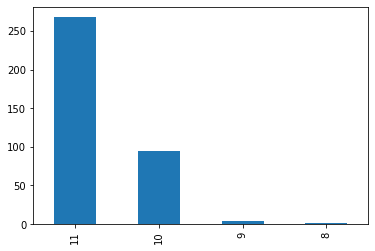

In [319]:
data1[data1['Website']=='Reliance_Digital']["Generation"].value_counts().plot(kind = 'bar')

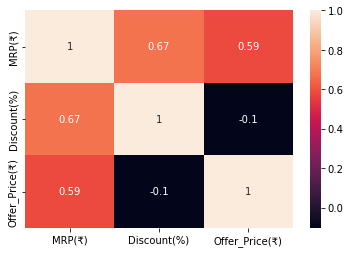

In [320]:
sns.heatmap(data1[['MRP(₹)','Discount(%)','Offer_Price(₹)']].corr(), annot=True)
plt.show()

In [321]:
# RAM(GB)

<AxesSubplot:>

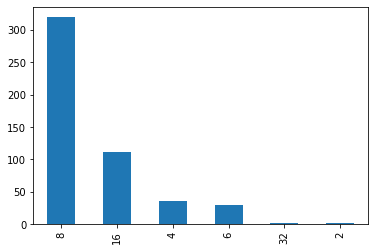

In [322]:
data1[data1['Website']=='flipkart']['RAM(GB)'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

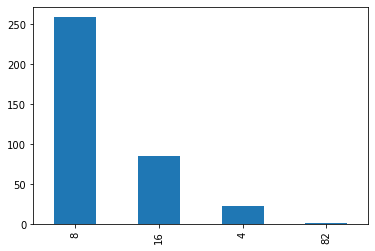

In [323]:
data1[data1['Website']=='Reliance_Digital']['RAM(GB)'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Website,Brand_Name'>

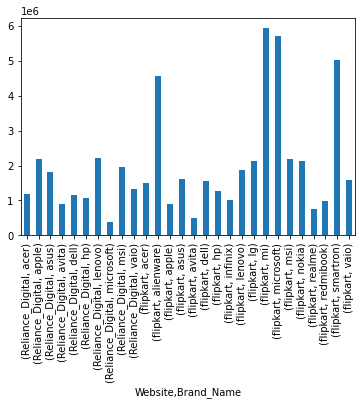

In [324]:
data1.groupby(['Website','Brand_Name'])['MRP(₹)'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Website,Brand_Name'>

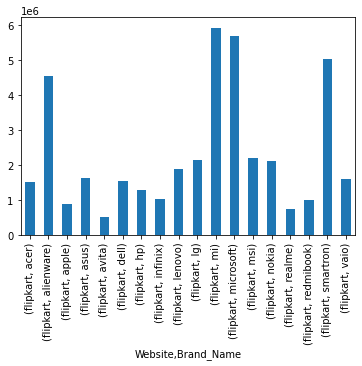

In [325]:
data1[data1['Website']=='flipkart'].groupby(['Website','Brand_Name'])["MRP(₹)"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Website,Brand_Name'>

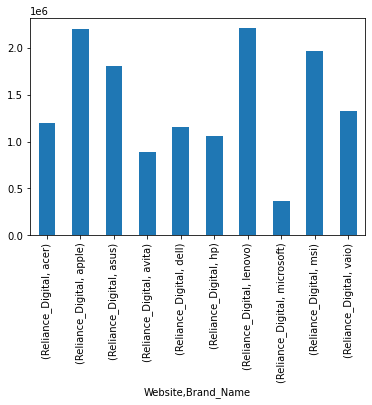

In [327]:
data1[data1['Website']=='Reliance_Digital'].groupby(['Website','Brand_Name'])["MRP(₹)"].mean().plot(kind = 'bar')

In [329]:
# No Of Brands offered in each website

In [331]:
no_of_Bra = pd.crosstab(data1['Website'], data1['Brand_Name'])
no_of_Bra

Brand_Name,acer,alienware,apple,asus,avita,dell,hp,infinix,lenovo,lg,mi,microsoft,msi,nokia,realme,redmibook,smartron,vaio
Website,,,,,,,,,,,,,,,,,,
Reliance_Digital,12,0,13,53,9,77,99,0,91,0,0,11,1,0,0,0,0,1
flipkart,42,1,15,91,2,69,56,83,83,3,1,2,44,1,2,2,1,1


In [332]:
fig = px.bar(no_of_Bra.T, text_auto=True)
fig.show()